# Classifying movie reviews: A binary classification example 

In [1]:
# import tensorflow as tf
# print(tf.__version__)

# # Set CPU as available physical device
# my_devices = tf.config.experimental.list_physical_devices(device_type='CPU')
# tf.config.experimental.set_visible_devices(devices= my_devices, device_type='CPU')

# # To find out which devices your operations and tensors are assigned to
# tf.debugging.set_log_device_placement(True)

# # Create some tensors and perform an operation
# a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
# b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
# c = tf.matmul(a, b)

# print(c)

In [2]:
# import tensorflow as tf

In [3]:
# tf.config.list_physical_devices('GPU')

In [4]:
# tf.config.list_physical_devices('CPU')

In [5]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [6]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
# import tensorflow as tf

In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8487111521877353133
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2232156160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9188525332835884699
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [8]:
from tensorflow.keras.datasets import imdb

In [9]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# top 10000 most frequently occurring words in the training data 

In [10]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [11]:
print(train_labels[0])

1


In [12]:
max(max(sequence) for sequence in train_data)

9999

#### Lisiting 4.2 Decoding reviews back to text

In [13]:
word_index = imdb.get_word_index() # word_index is a dictionary mapping words to integer index
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

In [14]:
word_index = imdb.get_word_index() # word_index is a dictionary mapping words to integer index
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

In [15]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [16]:
import numpy as np

In [17]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [18]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Listing 4.4 Model definition

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [23]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 45ms/step - loss: 0.4991 - accuracy: 0.8035 - val_loss: 0.3765 - val_accuracy: 0.8727
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2988 - accuracy: 0.9067 - val_loss: 0.3020 - val_accuracy: 0.8887
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2227 - accuracy: 0.9287 - val_loss: 0.2770 - val_accuracy: 0.8927
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1797 - accuracy: 0.9415 - val_loss: 0.2789 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1439 - accuracy: 0.9541 - val_loss: 0.2871 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1202 - accuracy: 0.9626 - val_loss: 0.2920 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1007 - accuracy: 0.9695 - val_loss: 0.3064 - val_accuracy: 0.8868
Epoch 8/20
30

In [26]:
history_dict = history.history

In [27]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
import matplotlib.pyplot as plt

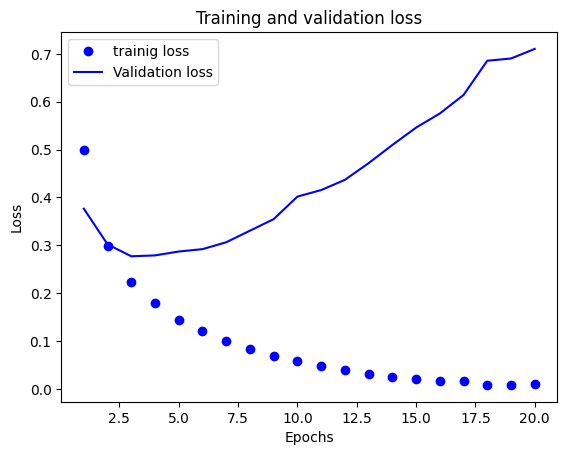

In [29]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='trainig loss') # bo - blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # b - solid blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

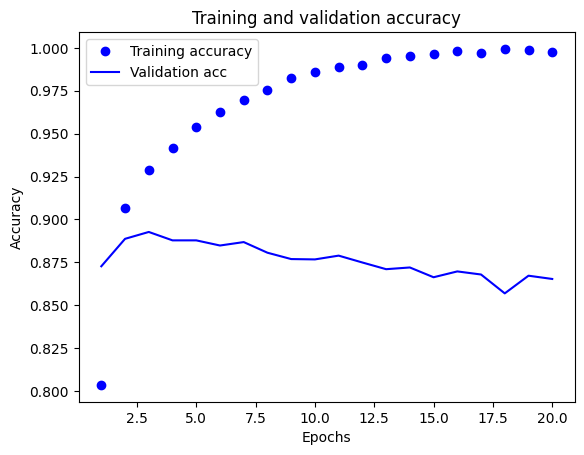

In [30]:
plt.clf() # clears the figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [32]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [33]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.4710 - accuracy: 0.8119
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2735 - accuracy: 0.9065
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2047 - accuracy: 0.9274
Epoch 4/4
49/49 [==============================] - 1s 18ms/step - loss: 0.1705 - accuracy: 0.9399


In [34]:
results=model.evaluate(x_test, y_test)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
results # test loss, test accuracy

In [ ]:
model.predict(x_test)

#### Further experiments

In [ ]:
model_1 = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model_3 = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model_1.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
history_model_1 = model_1.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))